<a href="https://colab.research.google.com/github/vtczk/imdb-bert-ktrain/blob/master/BertSentimentAnalisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sentiment analisis task is a binary classification (or sometimes multi class clasiffication if the neutral label is considered) in which the input text is assigned with the label assigning the sentece a positive or negative sentiment.In this notebook I will approach this topic using the Fast AI library ktrain. The training dataset will be standard IMDB review dataset containing positive/negative movie reviews (for more details refer to http://ai.stanford.edu/~amaas/data/sentiment/)

The network architecture will use transfer learning alongside the google BERT pretrained model to achieve very high accuracy in a single epoch of training.



In [0]:
!mkdir data

In [2]:
cd data

/content/data


In [3]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

--2020-01-04 07:18:57--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  19.3MB/s    in 6.7s    

2020-01-04 07:19:04 (11.9 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [0]:
 %%capture
! tar -xvf aclImdb_v1.tar.gz

In [5]:
!pip3 install ktrain

     |████████████████████████████████| 92kB 7.0MB/s 
     |████████████████████████████████| 1.0MB 29.4MB/s 
     |████████████████████████████████| 245kB 67.6MB/s 
     |████████████████████████████████| 1.8MB 79.6MB/s 
  Created wheel for ktrain: filename=ktrain-0.7.3-cp36-none-any.whl size=113951 sha256=b90b8b88d574ea9ca0b36c8847b05432e420ec8e520fa66fb3c8227f0494db21
  Stored in directory: /root/.cache/pip/wheels/86/20/70/000142264c6a768a4e8b67d8ef2ebc32c018684acb2eed7586
  Created wheel for keras-bert: filename=keras_bert-0.80.0-cp36-none-any.whl size=37923 sha256=945a89c197530dd1ccd5c2af3bcc38b2c987e024945795e73ce0c9b040eea9a7
  Stored in directory: /root/.cache/pip/wheels/63/dc/87/3260cb91f3aa32c0f85c5375429a30c8fd988bbb48f5ee21b0
  Created wheel for langdetect: filename=langdetect-1.0.7-cp36-none-any.whl size=993460 sha256=545673be72b5b8720db690549613f3f2e07d8e3157033d83b491891fb7d90556
  Stored in directory: /root/.cache/pip/wheels/ec/0c/a9/1647275e7ef5014e7b83ff30105180e33286

In [6]:
import ktrain
from ktrain import text

using Keras version: 2.2.4-tf


In [7]:
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_folder('/content/data/aclImdb/', 
                                                                       maxlen=500, 
                                                                       preprocess_mode='bert',
                                                                       train_test_names=['train', 
                                                                                         'test'],
                                                                       classes=['pos', 'neg'])

detected encoding: utf-8
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


preprocessing test...
language: en


In [8]:
model = text.text_classifier('bert', (x_train, y_train) , preproc=preproc)

Is Multi-Label? False
maxlen is 500
done.


In [0]:
learner = ktrain.get_learner(model, 
                             train_data=(x_train, y_train), 
                             val_data=(x_test, y_test), 
                             batch_size=6)

In [10]:
learner.lr_find()

simulating training for different learning rates... this may take a few moments...
Train on 25000 samples
Epoch 1/1024
 6780/25000 [=======>......................] - ETA: 42:32 - loss: 0.7310 - acc: 0.6133

done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


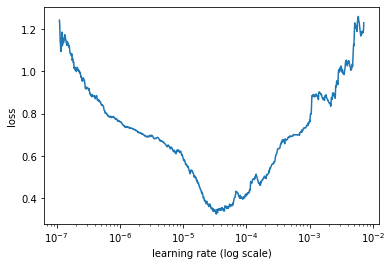

In [11]:
learner.lr_plot()

In [12]:
#Google recommended learning rate
learner.fit_onecycle(2e-5, 1)



begin training using onecycle policy with max lr of 2e-05...
Train on 25000 samples, validate on 25000 samples
25000/25000 [==============================] - 4632s 185ms/sample - loss: 0.2576 - acc: 0.8899 - val_loss: 0.1641 - val_acc: 0.9392


In [0]:
learner.save_model('/tmp/mymodel')

In [14]:
learner.validate(val_data=(x_test, y_test))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     12500
           1       0.93      0.95      0.94     12500

    accuracy                           0.94     25000
   macro avg       0.94      0.94      0.94     25000
weighted avg       0.94      0.94      0.94     25000



array([[11646,   854],
       [  667, 11833]])

In [0]:
predictor = ktrain.get_predictor(learner.model, preproc)


In [16]:
examples = ["This movie was horrible","I really enjoyed the action","This was so boring","This was rather far from great"]

predictor.predict(examples)


['neg', 'pos', 'neg', 'pos']

In [17]:
#Avengers endgame review from IMDB
actualEndgame = ["The writers got carried away, the directors over reached and the studio sacrificed the integrity of their product."]
predictor.predict(actualEndgame)

['neg']